In [487]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as svm
import matplotlib.pyplot as plt
import datetime



In [488]:
df_cab = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_cust = pd.read_csv("Customer_ID.csv")
df_tran = pd.read_csv("Transaction_ID.csv")
df_holiday = pd.read_csv("US Holiday Dates (2004-2021).csv")

# Hypothesis

1: Do the demand for cab service has seasonality, and do different companies experience different pattern

2: Which company is more profitable, what are factors that influence the profit

3: What are the structure for customer age, income, gender, and payment method for each company

4: Which company has better customer loyalty

5: How do the cab companies perform in different locations/cities

6: Do holidays have an impactonthe demand for cab service

# Cab Data Overview

In [489]:
df_cab.head(30)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [490]:
df_cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [491]:
df_cab['Date of Travel'].max()

43465

In [492]:
df_cab['Date of Travel'].min()

42371

In [493]:
df_cab['profit'] = df_cab['Price Charged'] - df_cab['Cost of Trip']

In [494]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [512]:
df_cab['date'] = pd.to_datetime(df_cab['Date of Travel'], origin='1899-12-30', unit='D')

# If you want to convert the datetime objects to a specific date format (e.g., YYYY-MM-DD), you can use strftime
df_cab['date'] = df_cab['date'].dt.strftime('%Y-%m-%d')

df_cab['date'] = pd.to_datetime(df_cab['date'])


# Extract the date and create a new column 'month'
df_cab['month'] = df_cab['date'].dt.month
# Extract the date and create a new column 'day'
df_cab['day'] = df_cab['date'].dt.day
# Extract the year and create a new column 'year'
df_cab['year'] = df_cab['date'].dt.year
# Assign the quarter and create a new column 'quater'
df_cab['quarter'] = df_cab['date'].dt.quarter
# Assign the week and create a new column 'week'
df_cab['week_of_month'] = (df_cab['date'].dt.day - 1) // 7 + 1

In [513]:
df_cab['profit_per_KM'] = df_cab['profit']/df_cab['KM Travelled']

In [514]:
df_cab.sort_values(by = 'date')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,date,month,day,year,quarter,week_of_month,profit_per_KM
1030,10001340,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760,2016-01-02,1,2,2016,1,1,6.536863
489,10000640,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960,2016-01-02,1,2,2016,1,1,10.576667
484,10000635,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548,2016-01-02,1,2,2016,1,1,7.805215
850,10001001,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,2016-01-02,1,2,2016,1,1,17.021667
160,10000171,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660,2016-01-02,1,2,2016,1,1,8.548039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355489,10435011,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980,2018-12-31,12,31,2018,4,5,0.891415
354114,10433309,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600,2018-12-31,12,31,2018,4,5,0.762617
356365,10435915,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388,2018-12-31,12,31,2018,4,5,-0.104598
359162,10439845,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488,2018-12-31,12,31,2018,4,5,5.590898


In [515]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,date,month,day,year,quarter,week_of_month,profit_per_KM
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016-01-08,1,8,2016,1,2,1.882266
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016-01-06,1,6,2016,1,1,0.826904
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016-01-02,1,2,2016,1,1,3.049558
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016-01-07,1,7,2016,1,1,0.777751
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016-01-03,1,3,2016,1,1,1.929439


In [516]:
df_new = df_cab.merge(df_tran, left_on = 'Transaction ID', right_on = 'Transaction ID')
df_new = df_new.merge(df_cust,left_on = 'Customer ID', right_on = 'Customer ID')
df_new = df_new.merge(df_city, left_on = 'City', right_on = 'City')
df_new.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,date,month,...,quarter,week_of_month,profit_per_KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016-01-08,1,...,1,2,1.882266,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018-07-21,7,...,3,3,10.739870,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018-11-23,11,...,4,4,4.574571,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016-01-06,1,...,1,1,0.826904,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018-04-21,4,...,2,3,6.981330,27703,Card,Male,27,9237,"814,885","24,701"


In [517]:
#df_new['year_month'] = df_new['date'].dt.to_period('M')

df_new['year_month'] = df_new['date'].dt.strftime('%Y-%m')

df_new['year_month'].dtype

dtype('O')

In [518]:
df_new

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,date,month,...,week_of_month,profit_per_KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year_month
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016-01-08,1,...,2,1.882266,29290,Card,Male,28,10813,"814,885","24,701",2016-01
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018-07-21,7,...,3,10.739870,29290,Cash,Male,28,10813,"814,885","24,701",2018-07
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018-11-23,11,...,4,4.574571,29290,Card,Male,28,10813,"814,885","24,701",2018-11
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016-01-06,1,...,1,0.826904,27703,Card,Male,27,9237,"814,885","24,701",2016-01
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018-04-21,4,...,3,6.981330,27703,Card,Male,27,9237,"814,885","24,701",2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,2018-03-03,3,...,1,3.740052,51406,Cash,Female,29,6829,"418,859","127,001",2018-03
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,2018-04-13,4,...,2,6.455574,51406,Cash,Female,29,6829,"418,859","127,001",2018-04
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,2018-07-06,7,...,1,-0.249531,51406,Card,Female,29,6829,"418,859","127,001",2018-07
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,2018-08-02,8,...,1,-0.220652,51406,Cash,Female,29,6829,"418,859","127,001",2018-08


# Market Share



Overall 

<AxesSubplot:ylabel='Company'>

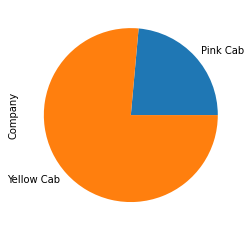

In [519]:
df_cab.groupby('Company')['Company'].count().plot(kind = 'pie')

# Pink Cab and Yellow Cab Seasonality comparison

Yearly Demand

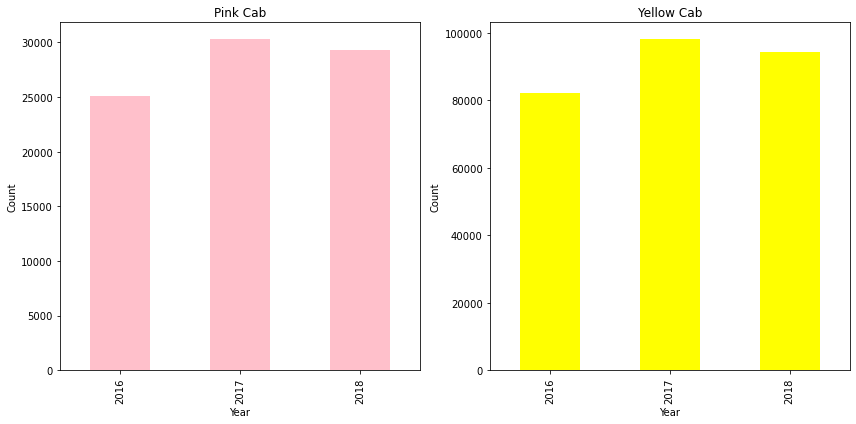

In [520]:
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Pink Cab
pink_cab_data.groupby('year')['year'].count().plot(kind='bar', ax=ax1, color='pink')
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')

# Plot for Yellow Cab
yellow_cab_data.groupby('year')['year'].count().plot(kind='bar', ax=ax2, color='yellow')
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Daily Demand

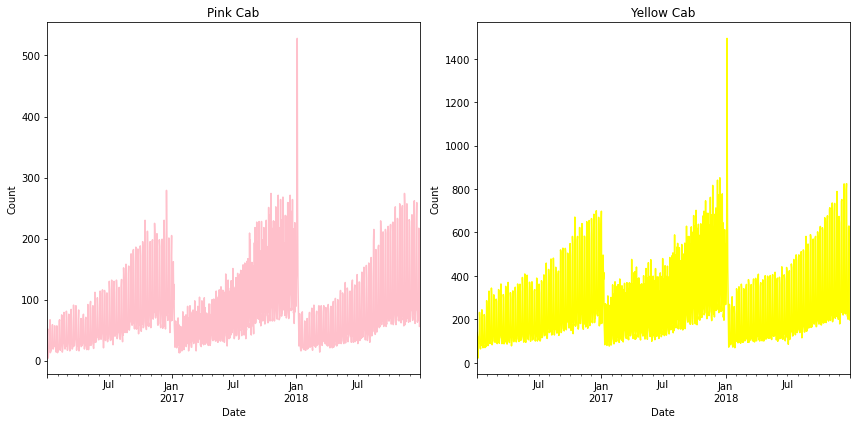

In [521]:
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Pink Cab
pink_cab_data.groupby('date')['date'].count().plot(ax=ax1, color='pink')
ax1.set_title('Pink Cab')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')

# Plot for Yellow Cab
yellow_cab_data.groupby('date')['date'].count().plot(ax=ax2, color='yellow')
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Quarterly Demand

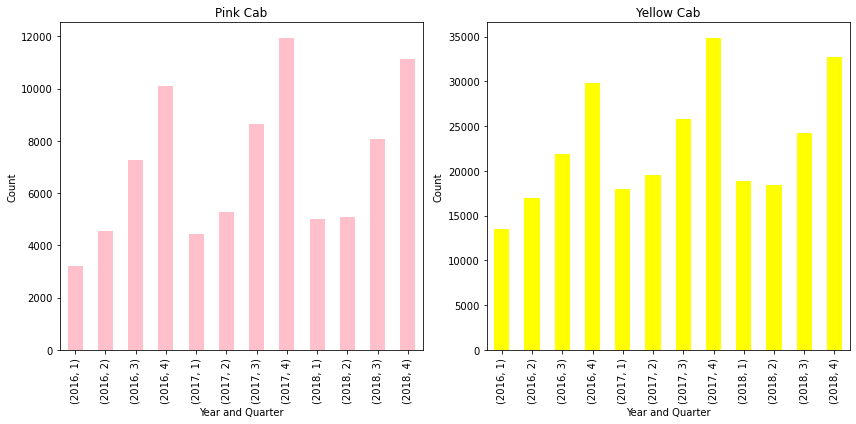

In [522]:
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Pink Cab
pink_cab_data.groupby(['year', 'quarter'])['Company'].count().plot(kind='bar', ax=ax1, color='pink')
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year and Quarter')
ax1.set_ylabel('Count')

# Plot for Yellow Cab
yellow_cab_data.groupby(['year', 'quarter'])['Company'].count().plot(kind='bar', ax=ax2, color='yellow')
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year and Quarter')
ax2.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

year & month demand

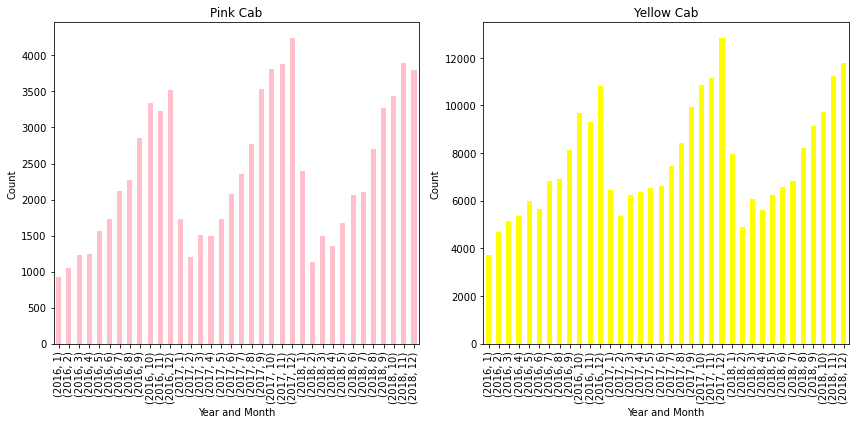

In [523]:
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Pink Cab
pink_cab_data.groupby(['year', 'month'])['Company'].count().plot(kind='bar', ax=ax1, color='pink')
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year and Month')
ax1.set_ylabel('Count')

# Plot for Yellow Cab
yellow_cab_data.groupby(['year', 'month'])['Company'].count().plot(kind='bar', ax=ax2, color='yellow')
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year and Month')
ax2.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Demand by week of month

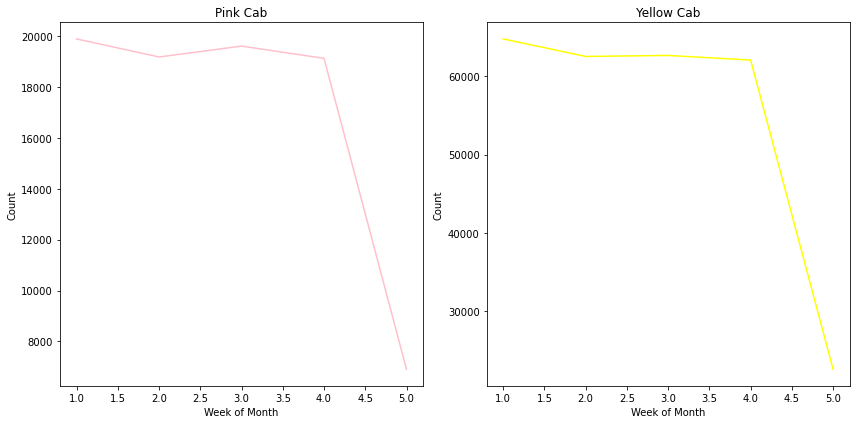

In [524]:
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Pink Cab
pink_cab_data.groupby('week_of_month')['week_of_month'].count().plot(ax=ax1, color='pink')
ax1.set_title('Pink Cab')
ax1.set_xlabel('Week of Month')
ax1.set_ylabel('Count')

# Plot for Yellow Cab
yellow_cab_data.groupby('week_of_month')['week_of_month'].count().plot(ax=ax2, color='yellow')
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Week of Month')
ax2.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Demand by Day of month 

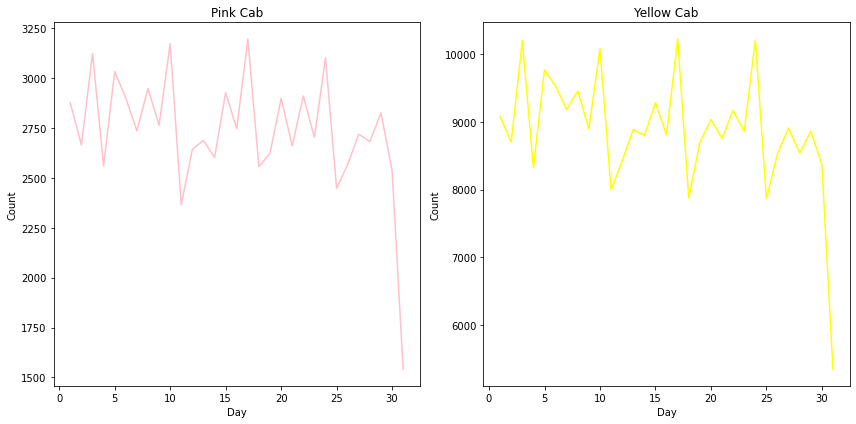

In [525]:
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Pink Cab
pink_cab_data.groupby('day')['day'].count().plot(ax=ax1, color='pink')
ax1.set_title('Pink Cab')
ax1.set_xlabel('Day')
ax1.set_ylabel('Count')

# Plot for Yellow Cab
yellow_cab_data.groupby('day')['day'].count().plot(ax=ax2, color='yellow')
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Day')
ax2.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Conclusion: 
The two companies follow identical seasonal pattern for year, quarter year&month, monthly, weekly and daily. They experience peak and trough at almost the same point in  time.

# Hypothesis 2: Profitability and Factors 

In [526]:
df_new['year_month']

0         2016-01
1         2018-07
2         2018-11
3         2016-01
4         2018-04
           ...   
359387    2018-03
359388    2018-04
359389    2018-07
359390    2018-08
359391    2018-08
Name: year_month, Length: 359392, dtype: object

In [527]:
df_pink = df_new[df_new['Company'] == 'Pink Cab']
df_yellow = df_new[df_new['Company'] == 'Yellow Cab']

Profit vs Time

In [528]:
#y1 = df_pink.profit.tolist()
x1 = df_pink.groupby('year_month')['profit'].sum().index
y1 = df_pink.groupby('year_month')['profit'].sum().values
#y1 = df_pink.groupby('year_month')['profit'].count().values
pink_ym = pd.DataFrame({'year_month': x1, 'profit': y1})

#y2 = df_yellow.profit.tolist()
x2 = df_yellow.groupby('year_month')['profit'].sum().index
y2 = df_yellow.groupby('year_month')['profit'].sum().values
#y2 = df_yellow.groupby('year_month')['profit'].count().values

yellow_ym = pd.DataFrame({'year_month': x2, 'profit': y2})

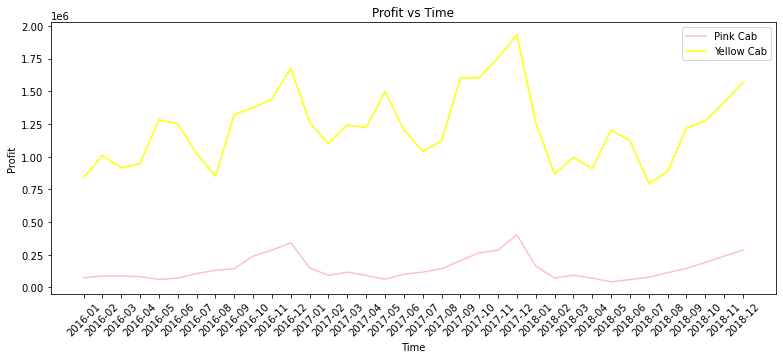

In [529]:

plt.figure(figsize=(13, 5)) 
plt.plot(x1, y1, label='Pink Cab',color='pink')
plt.plot(x2, y2, label='Yellow Cab',color='yellow')

# Adding labels and title
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Profit')
plt.title('Profit vs Time')



# Adding a legend
plt.legend()

Demand vs Time

In [530]:
#y1 = df_pink.profit.tolist()
time1 = df_pink.groupby('year_month')['year_month'].count().index
demand1 = df_pink.groupby('year_month')['year_month'].count().values
#y1 = df_pink.groupby('year_month')['profit'].count().values
pink_td = pd.DataFrame({'year_month': time1, 'demand': demand1})

#y2 = df_yellow.profit.tolist()
time2 = df_yellow.groupby('year_month')['year_month'].count().index
demand2 = df_yellow.groupby('year_month')['year_month'].count().values
#y2 = df_yellow.groupby('year_month')['profit'].count().values
yellow_td = pd.DataFrame({'year_month': time2, 'demand': demand2})

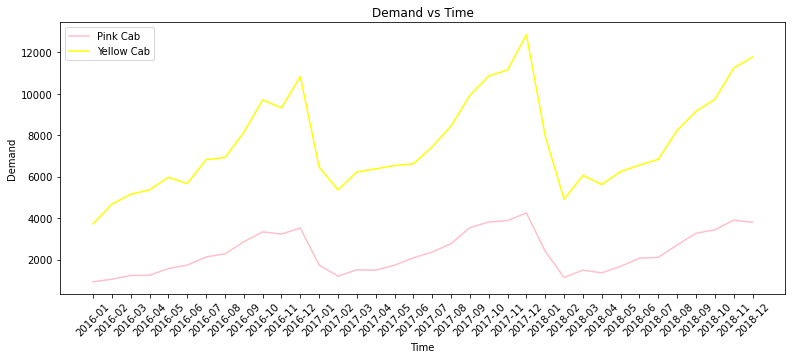

In [531]:

plt.figure(figsize=(13, 5)) 
plt.plot(time1, demand1, label='Pink Cab',color='pink')
plt.plot(time2, demand2, label='Yellow Cab',color='yellow')

# Adding labels and title
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Demand')
plt.title('Demand vs Time')



# Adding a legend
plt.legend()

Cost vs Time

In [532]:
#y1 = df_pink.profit.tolist()
x1 = df_pink.groupby('year_month')['Cost of Trip'].mean().index
y1 = df_pink.groupby('year_month')['Cost of Trip'].mean().values
#y1 = df_pink.groupby('year_month')['profit'].count().values
pink_tc = pd.DataFrame({'year_month': x1, 'Cost of Trip': y1})

#y2 = df_yellow.profit.tolist()
x2 = df_yellow.groupby('year_month')['Cost of Trip'].mean().index
y2 = df_yellow.groupby('year_month')['Cost of Trip'].mean().values
#y2 = df_yellow.groupby('year_month')['profit'].count().values
yellow_tc = pd.DataFrame({'year_month': x2, 'Cost of Trip': y2})

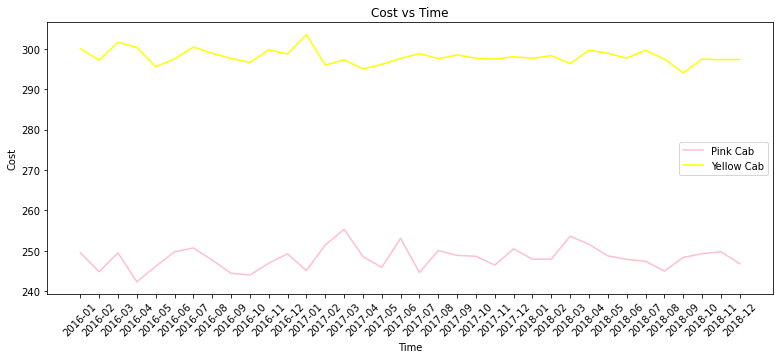

In [533]:
plt.figure(figsize=(13, 5)) 
plt.plot(x1, y1, label='Pink Cab',color='pink')
plt.plot(x2, y2, label='Yellow Cab',color='yellow')

# Adding labels and title
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Cost')
plt.title('Cost vs Time')



# Adding a legend
plt.legend()

Price Charged vs Time

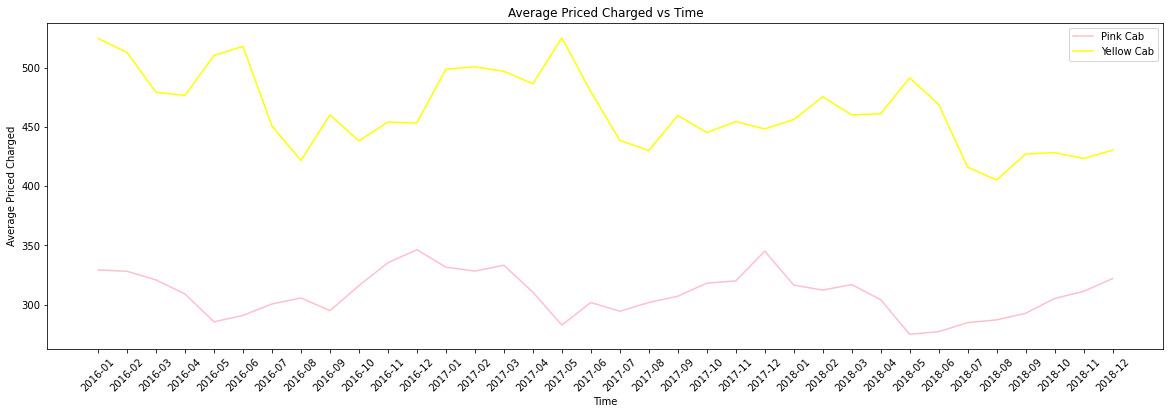

In [534]:
#y1 = df_pink.profit.tolist()
x1 = df_pink.groupby('year_month')['Price Charged'].mean().index
y1 = df_pink.groupby('year_month')['Price Charged'].mean().values
#y1 = df_pink.groupby('year_month')['profit'].count().values
pink_tp = pd.DataFrame({'year_month': x1, 'Price Charged': y1})

#y2 = df_yellow.profit.tolist()
x2 = df_yellow.groupby('year_month')['Price Charged'].mean().index
y2 = df_yellow.groupby('year_month')['Price Charged'].mean().values
#y2 = df_yellow.groupby('year_month')['profit'].count().values
yellow_tp = pd.DataFrame({'year_month': x2, 'Price Charged': y2})

plt.figure(figsize=(20, 6)) 
plt.plot(x1, y1, label='Pink Cab',color='pink')
plt.plot(x2, y2, label='Yellow Cab',color='yellow')

# Adding labels and title
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Average Priced Charged')
plt.title('Average Priced Charged vs Time')



# Adding a legend
plt.legend()


The cost stays fairly consistent throughout the years for both companyes


Yellow Cab is more profitable than pink cab throughout the entire time spam

In [535]:
#yellow_ym =yellow_ym.drop(yellow_ym.columns, axis=1)

In [536]:
pink_ym = pink_ym.merge(pink_td, left_on = 'year_month', right_on = 'year_month')

In [537]:
pink_ym = pink_ym.merge(pink_tc, left_on = 'year_month', right_on = 'year_month')

In [538]:
pink_ym = pink_ym.merge(pink_tp, left_on = 'year_month', right_on = 'year_month')

In [539]:
yellow_ym = yellow_ym.merge(yellow_td, left_on = 'year_month', right_on = 'year_month')

In [540]:
yellow_ym = yellow_ym.merge(yellow_tc, left_on = 'year_month', right_on = 'year_month')

In [541]:
yellow_ym = yellow_ym.merge(yellow_tp, left_on = 'year_month', right_on = 'year_month')

In [542]:
yellow_ym

,year_month,profit,demand,Cost of Trip,Price Charged
0,2016-01,8.363081e+05,3719,300.038088,524.912546
1,2016-02,1.009169e+06,4674,297.188780,513.100028
2,2016-03,9.147648e+05,5146,301.615806,479.378103
3,2016-04,9.461364e+05,5360,300.319160,476.837149
4,2016-05,1.282773e+06,5967,295.542838,510.520786
5,2016-06,1.250892e+06,5667,297.490716,518.223370
6,2016-07,1.024755e+06,6814,300.418625,450.808252
7,2016-08,8.501200e+05,6918,298.880160,421.765382
8,2016-09,1.322873e+06,8130,297.609613,460.324585
9,2016-10,1.373259e+06,9697,296.603726,438.220594


Correlation between Profit and Demand

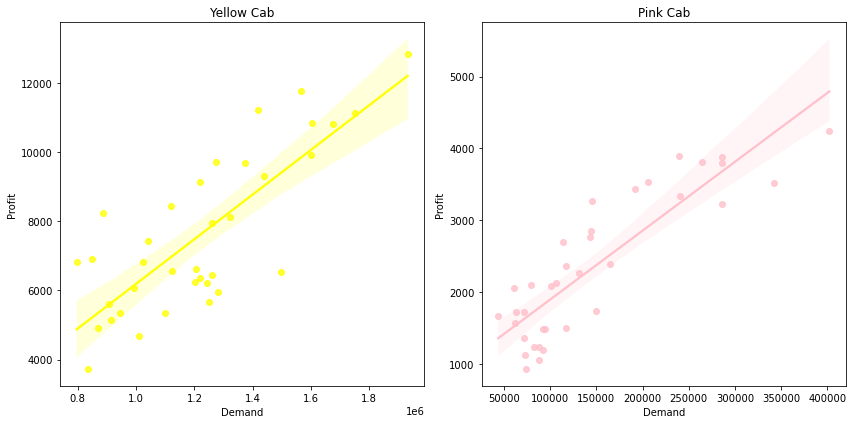

In [543]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Yellow Cab
sns.regplot(x=yellow_ym["profit"], y=yellow_ym["demand"], color='yellow', ax=axes[0])
axes[0].set_title('Yellow Cab')
axes[0].set_ylabel('Profit')
axes[0].set_xlabel('Demand')

# Plot for Pink Cab
sns.regplot(x=pink_ym["profit"], y=pink_ym["demand"], color='pink', ax=axes[1])
axes[1].set_title('Pink Cab')
axes[1].set_ylabel('Profit')
axes[1].set_xlabel('Demand')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Correlation between Profit and Price Charged

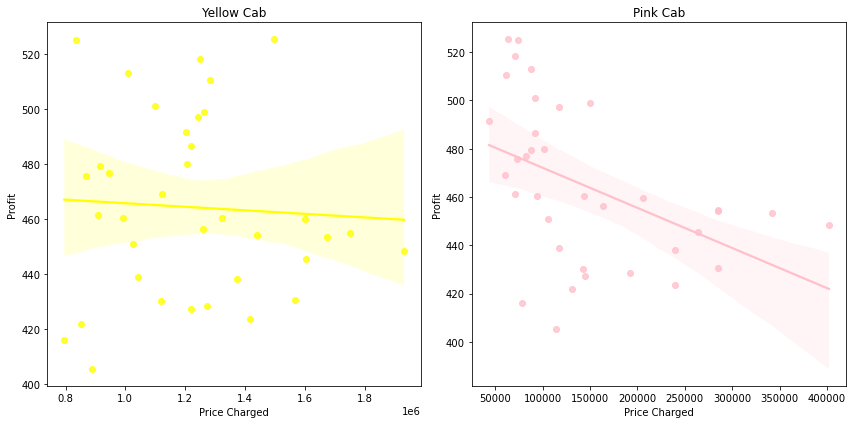

In [544]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Yellow Cab
sns.regplot(x=yellow_ym["profit"], y=yellow_ym["Price Charged"], color='yellow', ax=axes[0])
axes[0].set_title('Yellow Cab')
axes[0].set_ylabel('Profit')
axes[0].set_xlabel('Price Charged')

# Plot for Pink Cab
sns.regplot(x=pink_ym["profit"], y=yellow_ym["Price Charged"], color='pink', ax=axes[1])
axes[1].set_title('Pink Cab')
axes[1].set_ylabel('Profit')
axes[1].set_xlabel('Price Charged')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Correlation between Profit and Cost

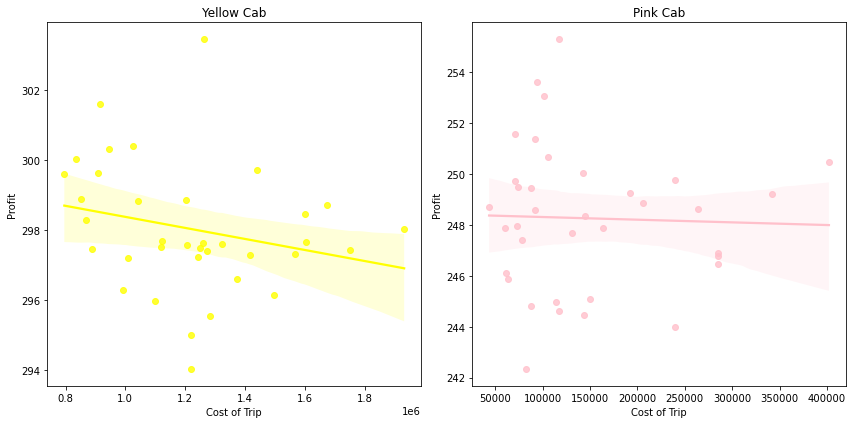

In [545]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Yellow Cab
sns.regplot(x=yellow_ym["profit"], y=yellow_ym["Cost of Trip"], color='yellow', ax=axes[0])
axes[0].set_title('Yellow Cab')
axes[0].set_ylabel('Profit')
axes[0].set_xlabel('Cost of Trip')

# Plot for Pink Cab
sns.regplot(x=pink_ym["profit"], y=pink_ym["Cost of Trip"], color='pink', ax=axes[1])
axes[1].set_title('Pink Cab')
axes[1].set_ylabel('Profit')
axes[1].set_xlabel('Cost of Trip')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Demand is highly correlated with profit

Price charged has negative correlation with profit. Such impact is more severe for pink cab

The cost of trip has negative impact on profit, but this is not very obvious for Pink Cab

# Hypothesis 3: Customer age, Income, Gender, and Payment method 

In [546]:
df_pink['Income_Bin'] = pd.cut(df_pink['Income (USD/Month)'], bins=5)
df_yellow['Income_Bin'] = pd.cut(df_yellow['Income (USD/Month)'], bins=5)

df_pink['Age_Bin'] = pd.cut(df_pink['Age'], bins=5)
df_yellow['Age_Bin'] = pd.cut(df_yellow['Age'], bins=5)

C:\Users\terry\AppData\Local\Temp\ipykernel_14340\4185593281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pink['Income_Bin'] = pd.cut(df_pink['Income (USD/Month)'], bins=5)
C:\Users\terry\AppData\Local\Temp\ipykernel_14340\4185593281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow['Income_Bin'] = pd.cut(df_yellow['Income (USD/Month)'], bins=5)
C:\Users\terry\AppData\Local\Temp\ipykernel_14340\4185593281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [547]:
df_new['Age_group'] = pd.cut(df_new['Age'], bins=5)
df_new['income_group'] = pd.cut(df_new['Income (USD/Month)'], bins=5)


Profit from different income group across time

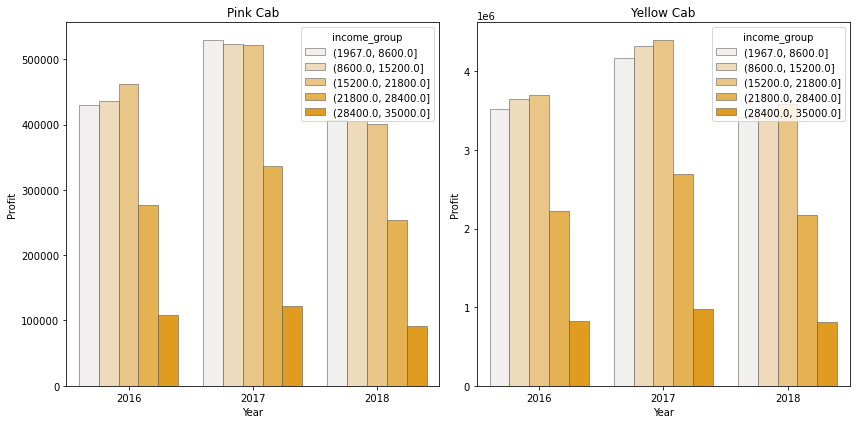

In [548]:
Pink_Cab = df_new[df_new['Company'] == 'Pink Cab']
Yellow_Cab = df_new[df_new['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Company X
sns.barplot(
    data=Pink_Cab,
    x="year",
    y="profit",
    hue="income_group",
    palette="light:orange",
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    #hue_order=labels,
    ci=None,
    ax=ax1
)
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit')
ax1.legend(title='income_group', loc='upper right')

# Plot for Company Y
sns.barplot(
    data=Yellow_Cab,
    x="year",
    y="profit",
    hue="income_group",
    palette="light:orange",
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    #hue_order=labels,
    ci=None,
    ax=ax2
)
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit')
ax2.legend(title='income_group', loc='upper right')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

profit from different age group across time

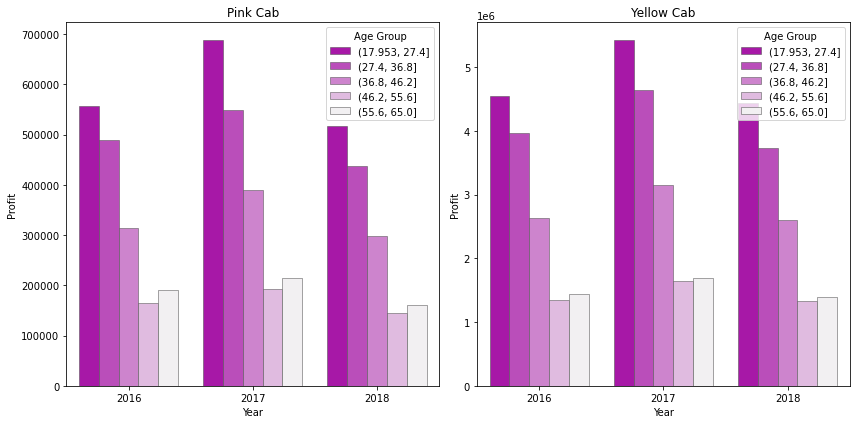

In [549]:
Pink_Cab = df_new[df_new['Company'] == 'Pink Cab']
Yellow_Cab = df_new[df_new['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Company X
sns.barplot(
    data=Pink_Cab,
    x="year",
    y="profit",
    hue="Age_group",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    #hue_order=labels,
    ci=None,
    ax=ax1
)
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit')
ax1.legend(title='Age Group', loc='upper right')

# Plot for Company Y
sns.barplot(
    data=Yellow_Cab,
    x="year",
    y="profit",
    hue="Age_group",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    #hue_order=labels,
    ci=None,
    ax=ax2
)
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit')
ax2.legend(title='Age Group', loc='upper right')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

profit from different gender group across time

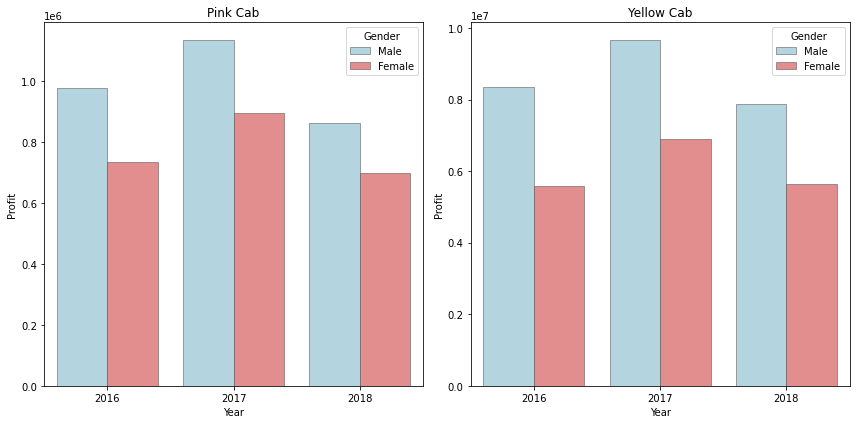

In [550]:
custom_palette = ["lightblue", "lightcoral"]

Pink_Cab = df_new[df_new['Company'] == 'Pink Cab']
Yellow_Cab = df_new[df_new['Company'] == 'Yellow Cab']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Company X
sns.barplot(
    data=Pink_Cab,
    x="year",
    y="profit",
    hue="Gender",
    palette=custom_palette,
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    #hue_order=labels,
    ci=None,
    ax=ax1
)
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit')
ax1.legend(title='Gender', loc='upper right')

# Plot for Company Y
sns.barplot(
    data=Yellow_Cab,
    x="year",
    y="profit",
    hue="Gender",
    palette=custom_palette,
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    #hue_order=labels,
    ci=None,
    ax=ax2
)
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit')
ax2.legend(title='Gender', loc='upper right')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [551]:
yr_method = df_new.groupby(['year','Payment_Mode'])['Payment_Mode'].count()
df_yr_method = yr_method.reset_index(name='Count')
df_yr_method

#df_new.groupby(['year','Payment_Mode','Company'])['Payment_Mode'].count().plot(kind = 'bar')

,year,Payment_Mode,Count
0,2016,Card,64339
1,2016,Cash,42980
2,2017,Card,76963
3,2017,Cash,51547
4,2018,Card,74202
5,2018,Cash,49361


In [552]:
df_pink_pay = df_pink.groupby(['year', 'Payment_Mode'])['Payment_Mode'].count()

# Converting the result to a DataFrame
df_pink_pay = df_pink_pay.reset_index(name='Count')
df_pink_pay

df_yellow_pay = df_yellow.groupby(['year', 'Payment_Mode'])['Payment_Mode'].count()

# Converting the result to a DataFrame
df_yellow_pay = df_yellow_pay.reset_index(name='Count')
df_yellow_pay

,year,Payment_Mode,Count
0,2016,Card,49342
1,2016,Cash,32897
2,2017,Card,58839
3,2017,Cash,39350
4,2018,Card,56604
5,2018,Cash,37649


demand from different payment method across time

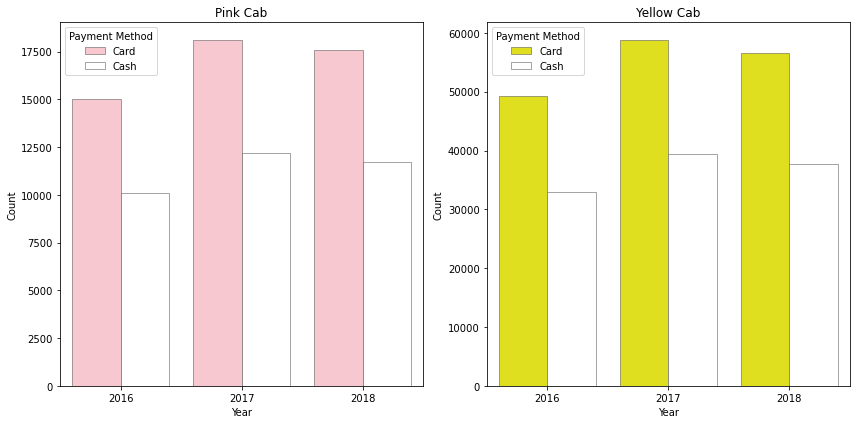

In [553]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Define custom color palettes
pink_palette = ["pink", "white"]
yellow_palette = ["yellow", "white"]

# Plot for Pink Cab
sns.barplot(
    data=df_pink_pay,
    x="year",
    y="Count",
    hue="Payment_Mode",
    palette=pink_palette,
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    ci=None,
    ax=ax1
)
ax1.set_title('Pink Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.legend(title='Payment Method', loc='upper left')

# Plot for Yellow Cab
sns.barplot(
    data=df_yellow_pay,
    x="year",
    y="Count",
    hue="Payment_Mode",
    palette=yellow_palette,
    edgecolor=".3",
    linewidth=.5,
    estimator=sum,
    ci=None,
    ax=ax2
)
ax2.set_title('Yellow Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.legend(title='Payment Method', loc='upper left')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

The structure of customer age, customer income, and customer gender are very similar for the two companies each year

# 4: Customer Loyalty

In [554]:
df_pink = df_pink.sort_values('year_month')

In [555]:
df_pink['next_year_month'] = 0

In [556]:
for index, value in df_pink['next_year_month'].iteritems():
    if df_pink.loc[index, 'month'] == 12:
        df_pink.loc[index, 'next_year_month'] = str(df_pink.loc[index, 'year'] + 1) + '-' + str(1)
    else:
        df_pink.loc[index, 'next_year_month'] = str(df_pink.loc[index, 'year']) + '-' + str(df_pink.loc[index, 'month'] +1)       

In [557]:
df_pink['return_count'] = 0

In [558]:
pink_customer_frequency = df_pink['Customer ID'].value_counts().reset_index()
pink_customer_frequency.columns = ['Customer ID', 'Frequency']
#pink_customer_frequency.groupby('Frequency')['Frequency'].count().plot(kind = 'bar', color = 'pink')

In [559]:
yellow_customer_frequency = df_yellow['Customer ID'].value_counts().reset_index()
yellow_customer_frequency.columns = ['Customer ID', 'Frequency']
#yellow_customer_frequency.groupby('Frequency')['Frequency'].count().plot(kind = 'bar',color = 'yellow')

Number of Users that return x amount of times total

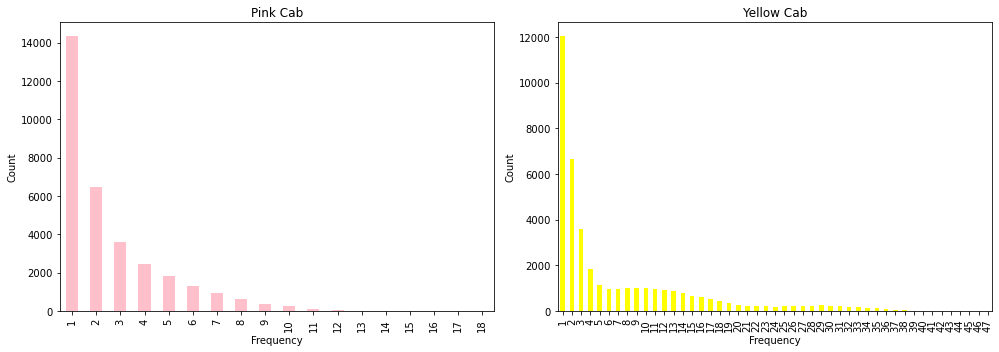

In [560]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the bar plot for Pink Cab customer frequency
pink_customer_frequency.groupby('Frequency')['Frequency'].count().plot(kind='bar', color='pink', ax=ax1)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Count')
ax1.set_title('Pink Cab')

# Plotting the bar plot for Yellow Cab customer frequency
yellow_customer_frequency.groupby('Frequency')['Frequency'].count().plot(kind='bar', color='yellow', ax=ax2)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Count')
ax2.set_title('Yellow Cab')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [561]:
df_2016_pink = df_pink[df_pink['year']==2016 ]
df_2017_pink = df_pink[df_pink['year']==2017]
df_2018_pink = df_pink[df_pink['year']==2018]

pink_customer_frequency_2016 = df_2016_pink['Customer ID'].value_counts().reset_index()
pink_customer_frequency_2016.columns = ['Customer ID', 'Frequency']
pink_customer_frequency_2016['year'] = 2016
pink_customer_frequency_2016['Company'] = 'Pink Cab'
pink_customer_frequency_2016['Total'] = df_2016_pink['Customer ID'].nunique()

pink_customer_frequency_2017 = df_2017_pink['Customer ID'].value_counts().reset_index()
pink_customer_frequency_2017.columns = ['Customer ID', 'Frequency']
pink_customer_frequency_2017['year'] = 2017
pink_customer_frequency_2017['Company'] = 'Pink Cab'
pink_customer_frequency_2017['Total'] = df_2017_pink['Customer ID'].nunique()

pink_customer_frequency_2018 = df_2018_pink['Customer ID'].value_counts().reset_index()
pink_customer_frequency_2018.columns = ['Customer ID', 'Frequency']
pink_customer_frequency_2018['year'] = 2018
pink_customer_frequency_2018['Company'] = 'Pink Cab'
pink_customer_frequency_2018['Total'] = df_2018_pink['Customer ID'].nunique()

df_2016_yellow = df_yellow[df_yellow['year']==2016 ]
df_2017_yellow = df_yellow[df_yellow['year']==2017]
df_2018_yellow = df_yellow[df_yellow['year']==2018]


yellow_customer_frequency_2016 = df_2016_yellow['Customer ID'].value_counts().reset_index()
yellow_customer_frequency_2016.columns = ['Customer ID', 'Frequency']
yellow_customer_frequency_2016['year'] = 2016
yellow_customer_frequency_2016['Company'] = 'Yellow Cab'
yellow_customer_frequency_2016['Total'] = df_2016_yellow['Customer ID'].nunique()

yellow_customer_frequency_2017 = df_2017_yellow['Customer ID'].value_counts().reset_index()
yellow_customer_frequency_2017.columns = ['Customer ID', 'Frequency']
yellow_customer_frequency_2017['year'] = 2017
yellow_customer_frequency_2017['Company'] = 'Yellow Cab'
yellow_customer_frequency_2017['Total'] = df_2017_yellow['Customer ID'].nunique()

yellow_customer_frequency_2018 = df_2018_yellow['Customer ID'].value_counts().reset_index()
yellow_customer_frequency_2018.columns = ['Customer ID', 'Frequency']
yellow_customer_frequency_2018['year'] = 2018
yellow_customer_frequency_2018['Company'] = 'Yellow Cab'
yellow_customer_frequency_2018['Total'] = df_2018_yellow['Customer ID'].nunique()


In [425]:
df_yellow_pink_2016 = pd.concat([pink_customer_frequency_2016, yellow_customer_frequency_2016])
df_yellow_pink_2017 = pd.concat([pink_customer_frequency_2017, yellow_customer_frequency_2017])
df_yellow_pink_2018 = pd.concat([pink_customer_frequency_2018, yellow_customer_frequency_2018])

df_yellow_pink = pd.concat([df_yellow_pink_2016, df_yellow_pink_2017, df_yellow_pink_2018])
df_yellow_pink['counts>5'] = 0

df_yellow_pink['Frequency_Category'] = df_yellow_pink['Frequency'].apply(lambda x: 1.0 if x > 5 else 0.0)


In [426]:
filtered_df_yellow_pink = df_yellow_pink.groupby(['year','Company'])['Frequency_Category'].sum()

In [427]:
filtered_df_yellow_pink = filtered_df_yellow_pink .reset_index()


Amount of Users that return more than 5 times for each company 

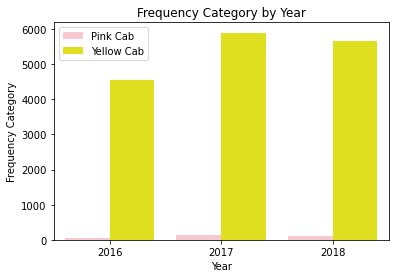

In [428]:
#sns.barplot(data = filtered_df_yellow_pink, x="year",y ='Frequency_Category'  ,hue="Company" )

colors = ["pink", "yellow"]

# Creating the bar plot
sns.barplot(data=filtered_df_yellow_pink, x="year", y="Frequency_Category", hue="Company", palette=colors)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Frequency Category")
plt.title("Frequency Category by Year")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [429]:
returning_customers_2016_pink_mask = df_2016_pink.groupby('Customer ID')['month'].nunique() >= 6
#returning_customers_2016_pink_mask.sum()

In [430]:
returning_customers_2016_yellow_mask = df_2016_yellow.groupby('Customer ID')['month'].nunique() >= 6
#returning_customers_2016_yellow_mask.sum()

In [431]:
returning_customers_2017_pink_mask = df_2017_pink.groupby('Customer ID')['month'].nunique() >= 6
#returning_customers_2017_pink_mask.sum()

In [432]:
returning_customers_2017_yellow_mask = df_2017_yellow.groupby('Customer ID')['month'].nunique() >= 6
#returning_customers_2017_yellow_mask.sum()

In [433]:
returning_customers_2018_pink_mask = df_2018_pink.groupby('Customer ID')['month'].nunique() >= 6
#returning_customers_2018_pink_mask.sum()

In [434]:
returning_customers_2018_yellow_mask = df_2018_yellow.groupby('Customer ID')['month'].nunique() >= 6
#returning_customers_2018_yellow_mask.sum()

In [435]:
filtered_df_yellow_pink['Return_in_diff_month']= 0 

In [436]:
filtered_df_yellow_pink['Return_in_diff_month'][0] = returning_customers_2016_pink_mask.sum()
filtered_df_yellow_pink['Return_in_diff_month'][1] = returning_customers_2016_yellow_mask.sum()
filtered_df_yellow_pink['Return_in_diff_month'][2] = returning_customers_2017_pink_mask.sum()
filtered_df_yellow_pink['Return_in_diff_month'][3] = returning_customers_2017_yellow_mask.sum()
filtered_df_yellow_pink['Return_in_diff_month'][4] = returning_customers_2018_pink_mask.sum()
filtered_df_yellow_pink['Return_in_diff_month'][5] = returning_customers_2018_yellow_mask.sum()

C:\Users\terry\AppData\Local\Temp\ipykernel_14340\269969158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_yellow_pink['Return_in_diff_month'][0] = returning_customers_2016_pink_mask.sum()
C:\Users\terry\AppData\Local\Temp\ipykernel_14340\269969158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_yellow_pink['Return_in_diff_month'][1] = returning_customers_2016_yellow_mask.sum()
C:\Users\terry\AppData\Local\Temp\ipykernel_14340\269969158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [437]:

filtered_df_yellow_pink['Total_unique_user'] = 0
filtered_df_yellow_pink['Total_unique_user'][0] = df_2016_pink['Customer ID'].nunique()
filtered_df_yellow_pink['Total_unique_user'][1] = df_2016_yellow['Customer ID'].nunique()
filtered_df_yellow_pink['Total_unique_user'][2] = df_2017_pink['Customer ID'].nunique()
filtered_df_yellow_pink['Total_unique_user'][3] = df_2017_yellow['Customer ID'].nunique()
filtered_df_yellow_pink['Total_unique_user'][4] = df_2018_pink['Customer ID'].nunique()
filtered_df_yellow_pink['Total_unique_user'][5] = df_2018_yellow['Customer ID'].nunique()
filtered_df_yellow_pink

C:\Users\terry\AppData\Local\Temp\ipykernel_14340\2697996138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_yellow_pink['Total_unique_user'][0] = df_2016_pink['Customer ID'].nunique()
C:\Users\terry\AppData\Local\Temp\ipykernel_14340\2697996138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_yellow_pink['Total_unique_user'][1] = df_2016_yellow['Customer ID'].nunique()
C:\Users\terry\AppData\Local\Temp\ipykernel_14340\2697996138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,year,Company,Frequency_Category,Return_in_diff_month,Total_unique_user
0,2016,Pink Cab,60.0,14,16661
1,2016,Yellow Cab,4534.0,2575,25937
2,2017,Pink Cab,135.0,39,18643
3,2017,Yellow Cab,5894.0,3742,27789
4,2018,Pink Cab,110.0,27,18400
5,2018,Yellow Cab,5647.0,3478,27470


In [438]:
filtered_df_yellow_pink['percentage'] = (filtered_df_yellow_pink['Return_in_diff_month']/filtered_df_yellow_pink['Total_unique_user']) * 100

In [439]:
filtered_df_yellow_pink

,year,Company,Frequency_Category,Return_in_diff_month,Total_unique_user,percentage
0,2016,Pink Cab,60.0,14,16661,0.084029
1,2016,Yellow Cab,4534.0,2575,25937,9.927902
2,2017,Pink Cab,135.0,39,18643,0.209194
3,2017,Yellow Cab,5894.0,3742,27789,13.465760
4,2018,Pink Cab,110.0,27,18400,0.146739
5,2018,Yellow Cab,5647.0,3478,27470,12.661085


Percentage of Users that uses the cab service in 6 different month each year

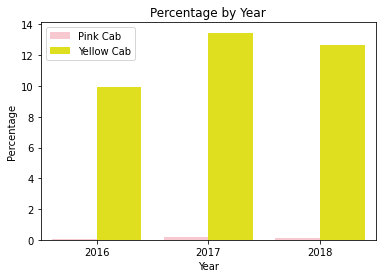

In [440]:


colors = ["pink", "yellow"]

# Creating the bar plot
sns.barplot(data=filtered_df_yellow_pink, x="year", y="percentage", hue="Company", palette=colors)
#sns.barplot(data = filtered_df_yellow_pink, x="year",y ='percentage'  ,hue="Company")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Percentage by Year")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [441]:
filtered_df_yellow_pink['Frequency/Total'] = (filtered_df_yellow_pink['Frequency_Category']/filtered_df_yellow_pink['Total_unique_user']) * 100

In [442]:
filtered_df_yellow_pink

,year,Company,Frequency_Category,Return_in_diff_month,Total_unique_user,percentage,Frequency/Total
0,2016,Pink Cab,60.0,14,16661,0.084029,0.360122
1,2016,Yellow Cab,4534.0,2575,25937,9.927902,17.480819
2,2017,Pink Cab,135.0,39,18643,0.209194,0.724132
3,2017,Yellow Cab,5894.0,3742,27789,13.465760,21.209831
4,2018,Pink Cab,110.0,27,18400,0.146739,0.597826
5,2018,Yellow Cab,5647.0,3478,27470,12.661085,20.556971


Perecentage of Users that uses the cab service more than 5 times each year

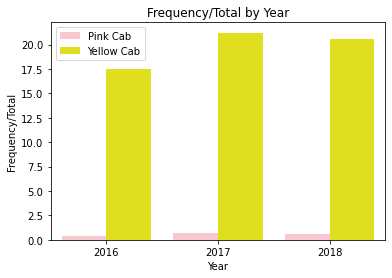

In [443]:
colors = ["pink", "yellow"]

# Creating the bar plot
sns.barplot(data=filtered_df_yellow_pink, x="year", y="Frequency/Total", hue="Company", palette=colors)
#sns.barplot(data = filtered_df_yellow_pink, x="year",y ='Frequency/Total'  ,hue="Company")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Frequency/Total")
plt.title("Frequency/Total by Year")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

Conclusion:
Comparison of percentage of loyal users are considered here because yellow cab has a much bigger user base. It is likely to have more loyal customers if going by pure quantity assuming that the two companies perform equally well.

Nevertheless, yellow company still has notibally higher percentage of customers that consistently return to their services

# 5: Perform in different locations/cities

In [444]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [445]:
df_city['Population'] = df_city['Population'].replace(",", "", regex=True)
df_city['Users'] = df_city['Users'].replace(",", "",regex=True)

df_city['Population'] = df_city['Population'].astype('int')
df_city['Users'] = df_city['Users'].astype('int')

In [446]:
df_city['user_percent'] = df_city['Users']/df_city['Population']

Total User Counts for every city

<AxesSubplot:xlabel='City'>

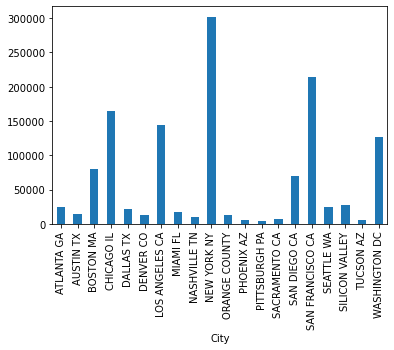

In [447]:
df_city.groupby('City')['Users'].sum().plot(kind = 'bar')

Average income of different cities

<AxesSubplot:xlabel='City'>

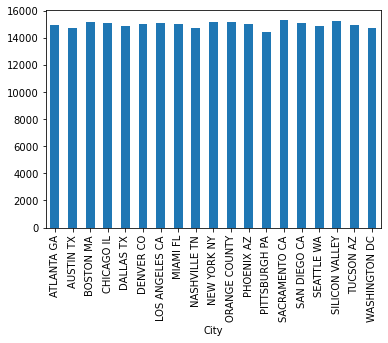

In [448]:
df_new.groupby(['City'])['Income (USD/Month)'].mean().plot(kind = 'bar')

Average age of different cities

<AxesSubplot:xlabel='City'>

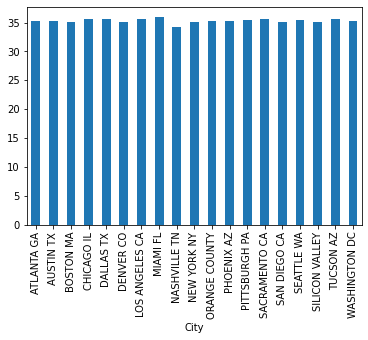

In [449]:
df_new.groupby(['City'])['Age'].mean().plot(kind = 'bar')

User counts comparison for different cities

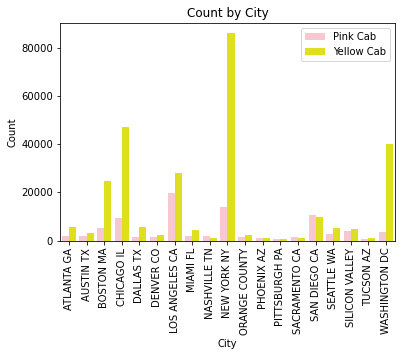

In [450]:
p = sns.countplot(data=df_cab, x="City", hue="Company", palette=["pink", "yellow"])
#p = sns.countplot(data=df_cab, x="City", hue="Company")
#p.set_xticklabels(p.get_xticklabels(), rotation=90)

# Rotating x-axis tick labels
p.set_xticklabels(p.get_xticklabels(), rotation=90)

# Adding labels and title
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Count by City")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

profit comparison in different city

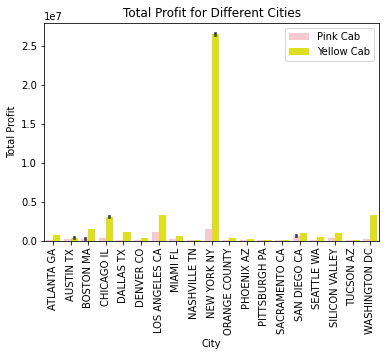

In [451]:
p = sns.barplot(data=df_cab, x="City", y="profit", hue="Company", estimator=sum, palette=["pink", "yellow"])

# Set the title and labels
plt.title("Total Profit for Different Cities")
plt.xlabel("City")
plt.ylabel("Total Profit")

# Rotating x-axis tick labels
p.set_xticklabels(p.get_xticklabels(), rotation=90)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [452]:
df_new.groupby(['City','Company'])['profit']

In [453]:
grouped_data = df_new.groupby(['year', 'City', 'Company'])['profit'].sum().reset_index()
grouped_data

,year,City,Company,profit
0,2016,ATLANTA GA,Pink Cab,34874.6300
1,2016,ATLANTA GA,Yellow Cab,230368.4680
2,2016,AUSTIN TX,Pink Cab,42780.8280
3,2016,AUSTIN TX,Yellow Cab,126061.6896
4,2016,BOSTON MA,Pink Cab,93632.3660
...,...,...,...,...
109,2018,SILICON VALLEY,Yellow Cab,314994.5208
110,2018,TUCSON AZ,Pink Cab,18462.2880
111,2018,TUCSON AZ,Yellow Cab,25861.5264
112,2018,WASHINGTON DC,Pink Cab,62193.1620


Profit of each company in different City over the years

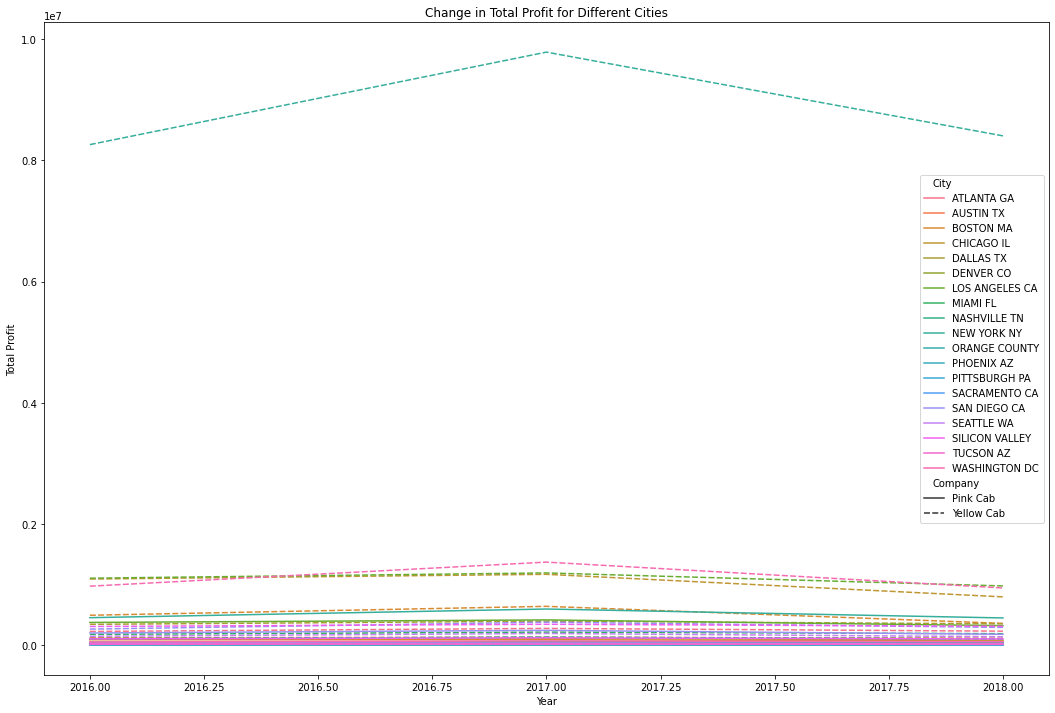

In [454]:
plt.figure(figsize=(18, 12)) 
sns.lineplot(data=grouped_data, x='year', y='profit', hue='City', style='Company')
plt.title('Change in Total Profit for Different Cities')

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

In [455]:
df_new['Population'] = df_new['Population'].replace(",", "", regex=True)
df_new.Population = df_new.Population.astype('int')
df_new['Users'] = df_new['Users'].replace(",", "",regex=True)
df_new['Users'] = df_new['Users'].astype('int')

In [456]:
df_city_user = df_new.groupby('City')['Users'].mean()
df_city_user.reset_index()

,City,Users
0,ATLANTA GA,24701.0
1,AUSTIN TX,14978.0
2,BOSTON MA,80021.0
3,CHICAGO IL,164468.0
4,DALLAS TX,22157.0
5,DENVER CO,12421.0
6,LOS ANGELES CA,144132.0
7,MIAMI FL,17675.0
8,NASHVILLE TN,9270.0
9,NEW YORK NY,302149.0


In [457]:

grouped_data = df_new.groupby(['City', 'Company'])['Users'].sum()


proportions = grouped_data.groupby('City').apply(lambda x: x / x.sum())


proportions = proportions.reset_index()

proportions.rename(columns={'Users': 'user_proportions'}, inplace=True)

In [458]:
df_city_user = df_new.groupby('City')['Users'].mean()
df_city_user = df_city_user.reset_index()
#df_city_user 

df_city_pop = df_new.groupby('City')['Population'].mean()
df_city_pop = df_city_pop.reset_index()


In [459]:
proportions = proportions.merge(df_city_user, left_on= 'City', right_on = 'City' )
proportions = proportions.merge(df_city_pop, left_on = 'City', right_on = 'City')


In [460]:
df_city_pink = proportions[proportions['Company'] == 'Pink Cab']
df_city_yellow = proportions[proportions['Company'] == 'Yellow Cab']


df_city_pink = df_city_pink.drop(df_city_pink[df_city_pink['City'] == 'NEW YORK NY'].index)
df_city_yellow = df_city_yellow.drop(df_city_yellow[df_city_yellow['City'] == 'NEW YORK NY'].index)

User Proportion vs Total User of each city

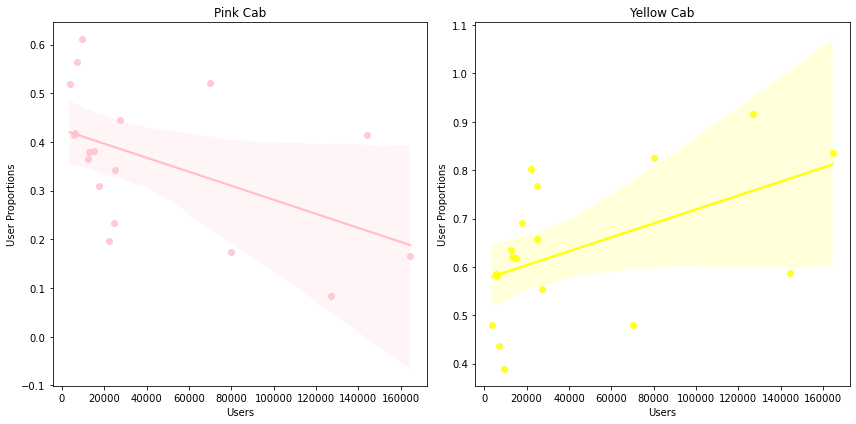

In [461]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#sns.regplot(x=df_city_pink["Users"], y=df_city_pink["user_proportions"], color='pink') 
#sns.regplot(x=df_city_yellow["Users"], y=df_city_yellow["user_proportions"], color='yellow')

# Plotting the regression plot for Pink Cab
sns.regplot(x=df_city_pink["Users"], y=df_city_pink["user_proportions"], color='pink', ax=axes[0])
axes[0].set_title('Pink Cab')
axes[0].set_xlabel('Users')
axes[0].set_ylabel('User Proportions')

# Plotting the regression plot for Yellow Cab
sns.regplot(x=df_city_yellow["Users"], y=df_city_yellow["user_proportions"], color='yellow', ax=axes[1])
axes[1].set_title('Yellow Cab')
axes[1].set_xlabel('Users')
axes[1].set_ylabel('User Proportions')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

User Proportion vs Total Population of each city

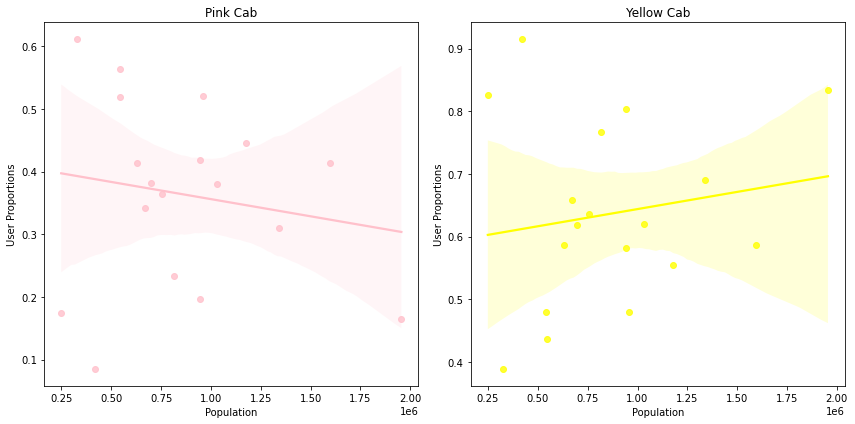

In [462]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the regression plot for Pink Cab
sns.regplot(x=df_city_pink["Population"], y=df_city_pink["user_proportions"], color='pink', ax=axes[0])
axes[0].set_title('Pink Cab')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('User Proportions')

# Plotting the regression plot for Yellow Cab
sns.regplot(x=df_city_yellow["Population"], y=df_city_yellow["user_proportions"], color='yellow', ax=axes[1])
axes[1].set_title('Yellow Cab')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('User Proportions')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Conclusion:
There could be a correlation between the user proportion of each cab company and the population size -- When comparing user proportion with total number of users, it appears that as the user amount increases, yellow cab will be more dominant not just amount wise, but also proportional wise.

However, when comparing user proportion with total population, even though the trend still suggest similar correlation, the effect is much less significant.

If the population and user data of more cities could be acquired, and whether a third cab company is running service in these cities is known, this part of the analysis can yield more clear conclusion.

Still, investing in Yellow Cab will make more sense because there is the possibility that they do become more dominent as population gets larger



# Hypothesis 6: Demand Association with Holiday

In [463]:
df_holiday = df_holiday[(df_holiday['Year'] == 2016) | (df_holiday['Year'] == 2017) |(df_holiday['Year'] == 2018)]
df_holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
12,2016-07-04,4th of July,Monday,7,4,2016
13,2017-07-04,4th of July,Tuesday,7,4,2017
14,2018-07-04,4th of July,Wednesday,7,4,2018
30,2016-12-25,Christmas Day,Sunday,12,25,2016
31,2017-12-25,Christmas Day,Monday,12,25,2017


In [464]:
df_holiday.Holiday.unique()

array(['4th of July', 'Christmas Day', 'Christmas Eve', 'Columbus Day',
       'Eastern Easter', 'Juneteenth', 'Labor Day', 'Labor Day Weekend',
       'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day",
       'New Year’s Eve', 'Thanksgiving Day', 'Thanksgiving Eve',
       'Valentine’s Day', 'Veterans Day', "Washington's Birthday",
       'Western Easter'], dtype=object)

In [465]:
df_holiday = df_holiday.drop(df_holiday.Holiday[(df_holiday.Holiday != '4th of July')&(df_holiday.Holiday != 'Christmas Day') & (df_holiday.Holiday != "New Year's Day")&(df_holiday.Holiday != "Thanksgiving Day")].index)

In [466]:
df_holiday = df_holiday.drop(columns = ['Month','Day','Year'])

In [467]:
df_holiday

,Date,Holiday,WeekDay
12,2016-07-04,4th of July,Monday
13,2017-07-04,4th of July,Tuesday
14,2018-07-04,4th of July,Wednesday
30,2016-12-25,Christmas Day,Sunday
31,2017-12-25,Christmas Day,Monday
32,2018-12-25,Christmas Day,Tuesday
202,2016-01-01,New Year's Day,Friday
203,2017-01-01,New Year's Day,Sunday
204,2018-01-01,New Year's Day,Monday
236,2018-11-22,Thanksgiving Day,Thursday


In [468]:
df_holiday['Date']= pd.to_datetime(df_holiday['Date'])

In [469]:
#df_new = df_new.merge(df_holiday, left_on ="date", right_on = 'Date',how ='outer')

In [470]:
df_july

<AxesSubplot:xlabel='day'>

In [471]:
#df_july = df_new[df_new['month'] == 7].groupby('day')['day'].count()

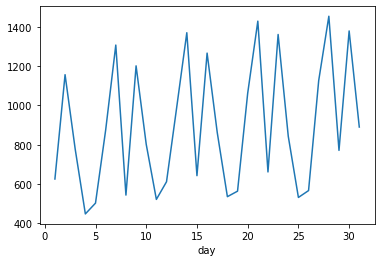

In [472]:
df_july = df_new[df_new['month'] == 7].groupby('day')['day'].count().plot()



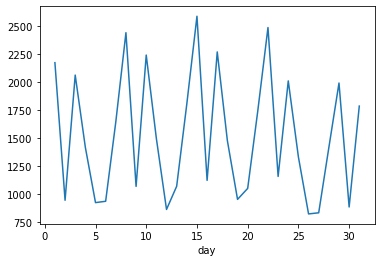

In [473]:
df_dec = df_new[df_new['month'] == 12].groupby('day')['day'].count().plot()

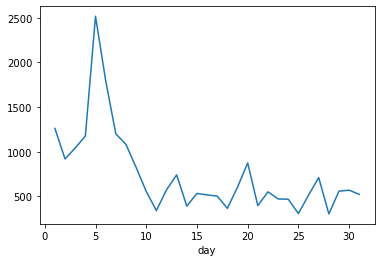

In [474]:
df_jan = df_new[df_new['month'] == 1].groupby('day')['day'].count().plot()

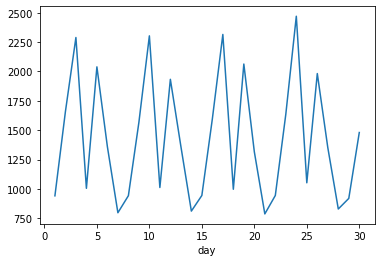

In [475]:
df_nov = df_new[df_new['month'] == 11].groupby('day')['day'].count().plot()

Christmas(12/25), July 4th(7/4), New Year's day, and Thanks giving don't seem to have much impact on the demand for cab service, as the demand in these months are not paricularly high on these days

Final Conclusion: XYZ company should invest in Yellow Cab because they perform better than Pink Cab in generating profit at all point in time, have more loyal customers, takes up the majority of business in most cities.

The two companies have similar seasonal pattern of demand, customer gender distribution, customer income distribution, customer age distribution and even payment method distribution. There isn't really any aspect in which Pink Cab is the better choice 

In [485]:
df_cab.shape

(359392, 7)

In [484]:
df_city.shape

(20, 3)

In [483]:
df_cust.shape

(49171, 4)

In [482]:
df_tran.shape

(440098, 3)

In [481]:
df_holiday.shape

(342, 6)